In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Trial testing k-means 
Study the drawbacks of this method

In [561]:
from sklearn.cluster import KMeans

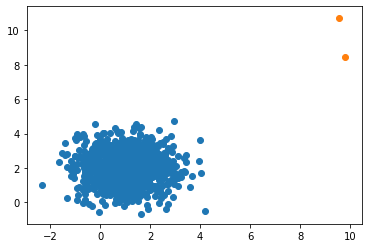

In [562]:
x_data = 1.+random.randn(1000)
y_data = 2.+.9*random.randn(1000)
x_data2 = 10.+random.randn(2)
y_data2 = 10.+random.randn(2)
scatter(x_data,y_data)
scatter(x_data2,y_data2)

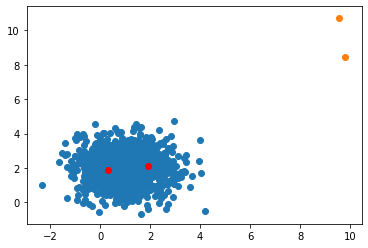

In [563]:
x_data_mixed = array(list(zip(list(x_data)+list(x_data2),list(y_data)+list(y_data2))))
kmeans = KMeans(n_clusters=2, random_state=0).fit(x_data_mixed)

scatter(x_data,y_data)
scatter(x_data2,y_data2)
scatter(kmeans.cluster_centers_[0][0],kmeans.cluster_centers_[0][1], facecolor='red')
scatter(kmeans.cluster_centers_[1][0],kmeans.cluster_centers_[1][1], facecolor='red')

In [564]:
kmeans.predict([[1,2]])

array([1], dtype=int32)

### Get data from the clicks data

In [72]:
import pandas as pd
from itertools import groupby

In [281]:
def ordered_set(arr):
    res=[]
    for i in arr:
        if i not in res:
            res.append(i)
    return(res)

In [ ]:
clicks = pd.read_csv('../data/JD_click_data.csv')

session_data = pd.read_pickle("click_stream_random_1k.pkl")
session_data.head()

u = session_data.sort_values(by='click_len').user
u = u.unique()

trial_user = u[500:]

In [552]:
cks = clicks.loc[clicks['user_ID'].isin(u)].sort_values(by='request_time')

In [474]:
revisits=[]
max_vert =[]
max_vert_len = []
for i,pu in enumerate(trial_user[200:]):

    p = cks[cks.user_ID == pu].sort_values(by='request_time').sku_ID.to_numpy()
    p = [key for key, group in groupby(p)]
    l = p
    x = ordered_set(l)
    dic = dict(zip(x, list(range(1,len(x)+1))))
    fin = [dic[v] for v in l]
    print(fin)
    f = [key for key, group in groupby(fin)]
    f.sort()
    
    try:
        m =max(fin)
        max_vert.append(m)
        max_vert_len.append(m/len(fin))
        print(m/len(f))
    except ValueError:
        continue
    revisits.append(sum([len(list(group))-1 for key, group in groupby(f)]))


[1, 2, 3, 2]
0.75
[1, 2]
1.0
[1, 2, 3, 4, 5]
1.0
[1, 2, 1, 3]
0.75
[1, 2, 3]
1.0
[1, 2, 1, 2]
0.5
[1, 2]
1.0
[1, 2, 1, 2]
0.5
[1, 2, 3, 4]
1.0
[1, 2, 3, 2, 4, 5]
0.8333333333333334
[1, 2, 1, 2]
0.5
[1, 2, 3, 4, 5]
1.0
[1, 2, 3, 2, 4]
0.8
[1, 2, 3, 4]
1.0
[1, 2, 3, 4, 5, 4]
0.8333333333333334
[1, 2]
1.0
[1, 2, 3]
1.0
[1, 2, 3, 4]
1.0
[1, 2, 3]
1.0
[1, 2, 3]
1.0
[1, 2, 3, 2, 4]
0.8
[1, 2, 3]
1.0
[1]
1.0
[1]
1.0
[1, 2, 3, 2, 1]
0.6
[1, 2]
1.0
[1, 2, 3]
1.0
[1]
1.0
[1, 2, 3, 4]
1.0
[1, 2, 1, 3, 1, 3]
0.5
[1, 2, 3]
1.0
[1]
1.0
[1, 2, 3]
1.0
[1, 2, 3, 4, 5]
1.0
[1, 2]
1.0
[1]
1.0
[1, 2]
1.0
[1, 2, 3]
1.0
[1, 2, 1, 3, 4, 5]
0.8333333333333334
[1, 2, 3, 2]
0.75
[1, 2, 3, 4]
1.0
[1, 2, 3]
1.0
[1, 2, 3, 4]
1.0
[1, 2, 3]
1.0
[1, 2, 3]
1.0
[1, 2, 1]
0.6666666666666666
[1, 2, 3, 4, 5, 6]
1.0
[1, 2, 3, 1]
0.75
[1, 2, 3, 4, 5, 4]
0.8333333333333334
[1, 2, 1, 3]
0.75
[1, 2, 1, 2, 1]
0.4
[1, 2, 3, 4]
1.0
[1, 2, 1]
0.6666666666666666
[1, 2, 3, 2, 4]
0.8
[1, 2, 3, 2, 4]
0.8
[1, 2, 3, 4, 5]
1.0
[1, 2, 3, 

[1, 2, 3, 4, 2, 4, 5, 4, 2, 6, 7, 8, 9, 8, 9, 8, 10, 11, 12, 13, 14, 15, 16, 7, 17, 18, 19]
0.7037037037037037
[1, 2, 1, 3, 1, 4, 5, 6, 7, 6]
0.7
[1, 2, 3, 4, 1, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 8, 7, 16]
0.8421052631578947
[1, 2, 3, 4, 5, 6, 7, 8, 9, 8, 9, 8, 9, 10, 11, 5, 12, 5]
0.6666666666666666
[1, 2, 3, 2, 3, 4, 2, 4, 3, 4, 5, 6, 7, 6, 3, 4, 2, 4, 2, 3, 2, 3, 6, 7]
0.2916666666666667
[1, 2, 3, 1, 2, 1, 4, 5, 6, 2, 1, 6, 7, 8, 2, 8, 9, 8, 10, 2, 10, 2, 11, 12]
0.5
[1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 1, 2, 4, 1, 4, 5, 4, 1]
0.2
[1, 2, 3, 2, 4, 2, 4, 5, 2, 4, 6, 2, 7, 2, 6, 7, 3, 7, 3, 7, 3, 2, 3, 2]
0.2916666666666667
[1, 2, 3, 4, 5, 6, 7, 6, 8, 9, 4, 1, 4, 1, 4, 10, 4, 11, 12, 13, 11, 13, 11]
0.5652173913043478
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 4, 5, 13, 14, 8, 15, 16, 17, 18, 19, 20, 21, 3, 22, 23, 16]
0.8214285714285714
[1, 2, 3, 4, 5, 6, 7, 2, 6, 8, 6, 9, 10, 11, 12, 10, 12, 10, 11, 12]
0.6
[1, 2, 3, 4, 5, 6, 7, 8, 7, 9, 6, 9, 10, 7, 6, 7, 10, 1, 10,

(array([ 2.,  5., 11., 11., 40., 26., 42., 51., 33., 78.]),
 array([0.15384615, 0.23846154, 0.32307692, 0.40769231, 0.49230769,
        0.57692308, 0.66153846, 0.74615385, 0.83076923, 0.91538462,
        1.        ]),
 <a list of 10 Patch objects>)

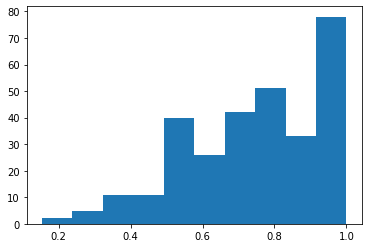

In [475]:
hist(max_vert_len)

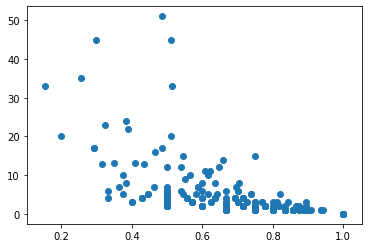

In [157]:
scatter(max_vert_len,[0.01*random.random()+revisits[i] for i,j in enumerate(max_vert_len)])

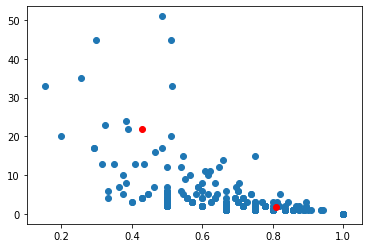

In [164]:
x_data_mixed = array(list(zip(list(max_vert_len),list(revisits))))
kmeans = KMeans(n_clusters=2, random_state=0).fit(x_data_mixed)

scatter(max_vert_len,revisits)
scatter(kmeans.cluster_centers_[0][0],kmeans.cluster_centers_[0][1], facecolor='red')
scatter(kmeans.cluster_centers_[1][0],kmeans.cluster_centers_[1][1], facecolor='red')

In [173]:
## Experiential = 0 , Goal oriented = 1

pu = "00002a195f"   #enter user id

p = cks[cks.user_ID == pu].sort_values(by='request_time').sku_ID.to_numpy()
p = [key for key, group in groupby(p)]
l = p
x = ordered_set(l)
dic = dict(zip(x, list(range(1,len(x)+1))))
fin = [dic[v] for v in l]
#####Enter FIN:
fin = [1,2,3,1,2,3,1,2,1,2,1,2,1,2,1,2]
print(fin)
f = [key for key, group in groupby(fin)]
f.sort()

m =max(fin)
metric1 = m/len(fin)
metric2 = 0
kmeans.predict([[metric1,metric2]])[0]

[1, 2, 3, 1, 2, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2]


0

In [165]:
kmeans.cluster_centers_

array([[ 0.81035526,  1.65508021],
       [ 0.42838864, 22.        ]])

### Scikit-learn GMM fitting
Fitting only the max_vert_len data to a Gaussian Mixture Model.

In [283]:
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

(array([ 2.,  5., 11., 11., 40., 26., 42., 51., 33., 78.]),
 array([0.15384615, 0.23846154, 0.32307692, 0.40769231, 0.49230769,
        0.57692308, 0.66153846, 0.74615385, 0.83076923, 0.91538462,
        1.        ]),
 <a list of 10 Patch objects>)

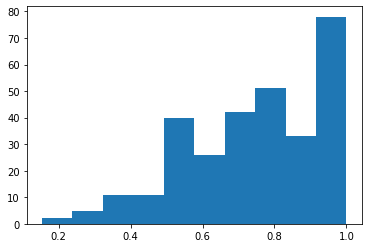

In [476]:
hist(max_vert_len)

In [532]:
trained_model = GaussianMixture(2).fit(reshape(max_vert_len,[-1,1]))

In [533]:
for i,j in zip(trained_model.means_,trained_model.covariances_):
    print (i[0],j[0])

0.8821767656289211 [0.01473435]
0.5721383652972505 [0.02120356]


In [630]:
def predict_user(user_string,model):
    p = cks[cks.user_ID == user_string].sort_values(by='request_time').sku_ID.to_numpy()
    p = [key for key, group in groupby(p)]
    l = p
    x = ordered_set(l)
    dic = dict(zip(x, list(range(1,len(x)+1))))
    fin = [dic[v] for v in l]
    print(fin)
    f = [key for key, group in groupby(fin)]
    f.sort()
    
    m =max(fin)
    metric1 = m/len(fin)
    label = int(model.predict([[metric1]]))
    prob = model.predict_proba([[metric1]])[0][label]

    if label==0 and model.means_[0][0] < model.means_[1][0]:
        print('This customer is Goal oriented with a probability of %.2f'%prob)
    elif label == 1 and model.means_[0][0] < model.means_[1][0]:
        print('This customer is Experiential with a probability of %.2f'%prob)
    elif label == 1 and model.means_[0][0] > model.means_[1][0]:
        print('This customer is Goal oriented with a probability of %.2f'%prob)
    elif label == 0 and model.means_[0][0] > model.means_[1][0]:
        print('This customer is Experiential with a probability of %.2f'%prob)
    
    
    
    
    
def predict_string(p,model):
    
    #clean product string:
    #print(p)
    p = [key for key, group in groupby(p)]
    x = ordered_set(p)
    dic = dict(zip(x, list(range(1,len(x)+1))))
    product_string = [dic[v] for v in p]
    #print(product_string)
    f = [key for key, group in groupby(product_string)]
    f.sort()
    
    m =max(product_string)
    metric1 = m/len(product_string)
    label = int(model.predict([[metric1]]))
    prob = model.predict_proba([[metric1]])[0][label]

    if label==0 and model.means_[0][0] < model.means_[1][0]:
        print('This customer is Goal oriented with a probability of %.2f'%prob)
    elif label == 1 and model.means_[0][0] < model.means_[1][0]:
        print('This customer is Experiential with a probability of %.2f'%prob)
    elif label == 1 and model.means_[0][0] > model.means_[1][0]:
        print('This customer is Goal oriented with a probability of %.2f'%prob)
    elif label == 0 and model.means_[0][0] > model.means_[1][0]:
        print('This customer is Experiential with a probability of %.2f'%prob)
    
    
    
    
    
    
    

#### Predict behaviour using product string

In [635]:
predict_string([1,2,1,2],trained_model)  

This customer is Goal oriented with a probability of 0.99


#### Predict behaviour using unique customer user 

In [623]:
predict_user(u[780],trained_model)

[1, 2, 3, 4, 5, 1]
This customer is Experiential with a probability of 0.8721000293493901


In [626]:
prob= .84
print('The history says %.2f'%prob)

The history says 0.84
